# Estatística

A estatística é a ciência de analisar dados.

## Estatística Descritiva

Vamos primeiro cobrir algumas estatísticas descritivas básicas.

As estatísticas descritivas resumem recursos importantes de um conjunto de dados, como:

- Contagem
- Soma
- Desvio padrão
- Percentil
- Média
- Etc

É um bom ponto de partida para se familiarizar com os dados.

Primeiro devemos carregar o nosso conjunto de dados referente à saúde de pessoas

Para esta tarefa, contamos com a ajuda da função **read_csv**

In [7]:
import pandas as pd

df = pd.read_csv('health_data_clean.csv')
df

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30,80,120,240,10,7
1,30,85,120,250,10,7
2,45,90,130,260,8,7
3,45,95,130,270,8,7
4,45,100,140,280,0,7
5,60,105,140,290,7,8
6,60,110,145,300,7,8
7,60,115,145,310,8,8
8,75,120,150,320,0,8
9,75,125,150,330,8,8


O conjunto de dados acima consiste em 6 variáveis, cada uma com 10 observações:

- **Duration** - Quanto tempo durou a sessão de treinamento em minutos?
- **Average_Pulse** - Qual foi o pulso médio da sessão de treinamento? Isso é medido por batimentos por minuto
- **Max_Pulse** - Qual foi o pulso máximo da sessão de treinamento?
- **Calorie_Burnage** - Quantas calorias foram queimadas na sessão de treinamento?
- **Hours_Work** - Quantas horas trabalhamos em nosso trabalho antes do treinamento?
- **Hours_Sleep** - Quanto dormimos na noite anterior ao treino?

A função Python **max()** é usada para encontrar o **valor mais alto** em um array

In [10]:
Average_pulse_max = max(df['Average_Pulse'])
Average_pulse_max

125

A função Python **min()** é usada para encontrar o **valor mais baixo** em um array

In [11]:
Average_pulse_min = min(df['Average_Pulse'])
Average_pulse_min

80

A função **mean()** é usada para encontrar o **valor médio** de um array

In [15]:
Average_calorie_burnage = df['Calorie_Burnage'].mean()
Average_calorie_burnage

285.0

## Preparação de Dados

Antes de analisar os dados, um cientista de dados deve extrair os dados e torná-los claros e valiosos.

Vamos novamente carregar um conjunto de dados para que possamos prepará-lo para análise.

In [16]:
dados = pd.read_csv("health_data.csv", header=0, sep=",")
dados

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30.0,80,120,240.0,10.0,7.0
1,45.0,85,120,250.0,10.0,7.0
2,45.0,90,130,260.0,8.0,7.0
3,60.0,95,130,270.0,8.0,7.0
4,60.0,100,140,280.0,0.0,7.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,60.0,105,140,290.0,7.0,8.0
7,60.0,110,145,300.0,7.0,8.0
8,45.0,NaN,AF,NaN,8.0,8.0
9,45.0,115,145,310.0,8.0,8.0


Observe que:

- Estamos nomeando o **DataFrame** com o nome **dados**
- `header = 0` significa que os cabeçalhos para os nomes das variáveis devem ser encontrados na primeira linha (note que 0 significa a primeira linha em Python)
- `sep = ","` significa que "," é usado como separador entre os valores. Isso ocorre porque estamos usando o tipo de arquivo **.csv** (comma separated values)

Se você tiver um arquivo CSV muito grande, poderá usar a função **head()** para mostrar apenas as **5 linhas principais**.

In [17]:
dados.head()

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30.0,80,120,240.0,10.0,7.0
1,45.0,85,120,250.0,10.0,7.0
2,45.0,90,130,260.0,8.0,7.0
3,60.0,95,130,270.0,8.0,7.0
4,60.0,100,140,280.0,0.0,7.0


## Limpeza de Dados

Observe os dados importados. Como podemos ver, os dados estão "sujos" com valores incorretos ou não registrados.

In [18]:
dados

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30.0,80,120,240.0,10.0,7.0
1,45.0,85,120,250.0,10.0,7.0
2,45.0,90,130,260.0,8.0,7.0
3,60.0,95,130,270.0,8.0,7.0
4,60.0,100,140,280.0,0.0,7.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,60.0,105,140,290.0,7.0,8.0
7,60.0,110,145,300.0,7.0,8.0
8,45.0,NaN,AF,NaN,8.0,8.0
9,45.0,115,145,310.0,8.0,8.0


Perceba que:
    
- Existem alguns campos em branco
- **Average_Pulse** de 9.000 não é possível
- 9 000 será tratado como não numérico, por causa do separador de espaço
- Uma observação do **Max_Pulse** é denotada como "AF", o que não faz sentido

Portanto, devemos limpar os dados para realizar a análise.

## Remover Linhas em Branco

Vemos que os valores não numéricos (9 000 e AF) estão nas mesmas linhas com valores ausentes.

**Solução:** Podemos remover as linhas com observações ausentes para corrigir este problema.

Quando carregamos um conjunto de dados usando o Pandas, todas as células em branco são automaticamente convertidas em valores **"NaN"**.

Portanto, remover as células NaN nos dá um conjunto de dados limpo que pode ser analisado.

Podemos usar a função **dropna()** para remover os NaNs. 

`axis = 0` significa que queremos remover todas as linhas que têm um valor NaN.

In [19]:
dados.dropna(axis=0,inplace=True)

In [20]:
dados

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30.0,80,120,240.0,10.0,7.0
1,45.0,85,120,250.0,10.0,7.0
2,45.0,90,130,260.0,8.0,7.0
3,60.0,95,130,270.0,8.0,7.0
4,60.0,100,140,280.0,0.0,7.0
6,60.0,105,140,290.0,7.0,8.0
7,60.0,110,145,300.0,7.0,8.0
9,45.0,115,145,310.0,8.0,8.0
10,60.0,120,150,320.0,0.0,8.0
12,45.0,125,150,330.0,8.0,8.0


## Categorias de Dados

Para analisar dados, também precisamos saber os tipos de dados com os quais estamos lidando.

Os dados podem ser divididos em três categorias principais:

1. **Numérico** - Contém valores numéricos. Pode ser dividido em duas categorias:
    - **Discreto**: Os números são contados como "inteiros". **Exemplo:** Você não pode ter treinado 2.5 sessões, é 2 ou 3 sessões
    - **Contínuo**: Os números podem ter uma precisão infinita. **Exemplo:** você pode dormir 7 horas, 30 minutos e 20 segundos ou 7.533 horas
2. **Categórico** - Contém valores que não podem ser comparados entre si. Exemplo: uma cor ou tipo de treinamento
3. **Ordinal** - Contém dados categóricos que podem ser comparados entre si. Exemplo: notas escolares onde **A** é melhor do que **B** e assim por diante

Conhecendo o tipo de seus dados, você saberá qual técnica usar para analisá-los.

## Tipos de Dados

Podemos usar a função **info()** para listar os tipos de dados em nosso conjunto de dados.

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 12
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         10 non-null     float64
 1   Average_Pulse    10 non-null     object 
 2   Max_Pulse        10 non-null     object 
 3   Calorie_Burnage  10 non-null     float64
 4   Hours_Work       10 non-null     float64
 5   Hours_Sleep      10 non-null     float64
dtypes: float64(4), object(2)
memory usage: 560.0+ bytes


Vemos que esse conjunto de dados tem dois tipos diferentes de dados:

- float64
- object

Não podemos usar **objects** para calcular e realizar análises aqui. 

Devemos converter o tipo **object** para float64.

Podemos usar a função **astype()** para converter os dados em float64.

O exemplo a seguir converte **"Average_Pulse"** e **"Max_Pulse"** no tipo de dados float64 (as outras variáveis já são do tipo de dados float64).

In [25]:
dados["Average_Pulse"] = dados['Average_Pulse'].astype(float)
dados["Max_Pulse"] = dados["Max_Pulse"].astype(float)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 12
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         10 non-null     float64
 1   Average_Pulse    10 non-null     float64
 2   Max_Pulse        10 non-null     float64
 3   Calorie_Burnage  10 non-null     float64
 4   Hours_Work       10 non-null     float64
 5   Hours_Sleep      10 non-null     float64
dtypes: float64(6)
memory usage: 560.0 bytes


Agora, o conjunto de dados tem apenas tipos de dados **float64**.

## Analisando os Dados

Depois de limpar o conjunto de dados, podemos começar a analisar os dados.

Podemos usar a função **describe()** para resumir os dados.

In [26]:
dados.describe()

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,51.000000,102.500000,137.000000,285.000000,6.600000,7.500000
std,10.488088,15.138252,11.352924,30.276504,3.627059,0.527046
min,30.000000,80.000000,120.000000,240.000000,0.000000,7.000000
25%,45.000000,91.250000,130.000000,262.500000,7.000000,7.000000
50%,52.500000,102.500000,140.000000,285.000000,8.000000,7.500000
75%,60.000000,113.750000,145.000000,307.500000,8.000000,8.000000
max,60.000000,125.000000,150.000000,330.000000,10.000000,8.000000


- **count** - conta o número de observações
- **mean** - o valor médio
- **std** - desvio padrão 
- **min** - o valor mais baixo
- **max** - o valor mais alto
- **25%**, **50%** e **75%** - são percentis

## 25%, 50% e 75% - Percentis

Os percentis são usados em estatísticas para fornecer um número que descreve o valor que uma determinada porcentagem dos valores é inferior.

Vamos tentar explicar por alguns exemplos, usando **Average_Pulse**:

- O percentil **25%** de **Average_Pulse** significa que 25% de todas as sessões de treinamento têm um pulso médio de 91.25 batimentos por minuto ou menos. Se invertermos a afirmação, isso significa que 75% de todas as sessões de treinamento têm um pulso médio de 91.25 batimentos por minuto ou mais
- O percentil **75%** de **Average_Pulse** significa que 75% de toda a sessão de treinamento tem um pulso médio de 113.75 ou inferior. Se invertermos a afirmação, isso significa que 25% de todas as sessões de treinamento têm um pulso médio de 113.75 batimentos por minuto ou mais

### Encontrando o percentil de 10% para Max_Pulse

Para este exemplo vamos usar a biblioteca **NumPy**.

In [28]:
import numpy as np

percetile_10 = np.percentile(dados['Max_Pulse'],10)
percetile_10

120.0

## Desvio Padrão

O desvio padrão é um número que descreve a dispersão das observações.

Uma função matemática terá dificuldade em prever valores precisos, se as observações estiverem "espalhadas". 

O desvio padrão é uma medida de incerteza.

Um desvio padrão baixo significa que a maioria dos números está próxima do valor médio (**média**).

Um alto desvio padrão significa que os valores estão espalhados por uma faixa mais ampla.

O **Desvio Padrão** é frequentemente representado pelo símbolo Sigma: $\sigma$

Podemos usar a função **std()** de NumPy para encontrar o desvio padrão de uma variável.

In [34]:
std = np.std(dados)
std

Duration            9.949874
Average_Pulse      14.361407
Max_Pulse          10.770330
Calorie_Burnage    28.722813
Hours_Work          3.440930
Hours_Sleep         0.500000
dtype: float64

## Coeficiente de Variação

O coeficiente de variação é usado para se ter uma ideia de quão grande é o desvio padrão.

Matematicamente, o coeficiente de variação é definido como:

`Coefficient of Variation = Standard Deviation / Mean`

Podemos fazer isso em Python se prosseguirmos com o seguinte código.

In [35]:
cv = np.std(dados) / np.mean(dados)
print(cv)

Duration           0.195096
Average_Pulse      0.140111
Max_Pulse          0.078616
Calorie_Burnage    0.100782
Hours_Work         0.521353
Hours_Sleep        0.066667
dtype: float64


## Variância

A variância é outro número que indica a dispersão dos valores.

Na verdade, se extrairmos a raiz quadrada da variância, vamos obter o **desvio padrão**. 

Ou o contrário, se multiplicarmos o desvio padrão por ele mesmo, obteremos a **variância**!

Podemos usar a função **var()** de NumPy para encontrar a variância.

In [36]:
var = np.var(dados)
print(var)

Duration            99.00
Average_Pulse      206.25
Max_Pulse          116.00
Calorie_Burnage    825.00
Hours_Work          11.84
Hours_Sleep          0.25
dtype: float64


## Correlação 

A correlação mede a relação entre duas variáveis.

Mencionamos que uma função tem o propósito de prever um valor, convertendo a input(**x**) em output(**f(x)**). 

Podemos dizer também que uma função usa a relação entre duas variáveis para predição.

### Coeficiente de Correlação

O coeficiente de correlação mede a relação entre duas variáveis.

O coeficiente de correlação nunca pode ser menor que **-1** ou maior que **1**.

- `1` = há uma relação linear perfeita entre as variáveis (como Average_Pulse contra Calorie_Burnage)
- `0` = não há relação linear entre as variáveis
- `-1` = há uma relação linear negativa perfeita entre as variáveis (por exemplo, menos horas trabalhadas, leva a uma maior queima de calorias durante uma sessão de treinamento)

### Exemplo de uma relação linear perfeita (coeficiente de correlação = 1)

Usaremos o gráfico de dispersão para visualizar a relação entre **Average_Pulse** e **Calorie_Burnage**

Desta vez, queremos gráficos de dispersão, então mudamos o tipo para **"scatter"**.

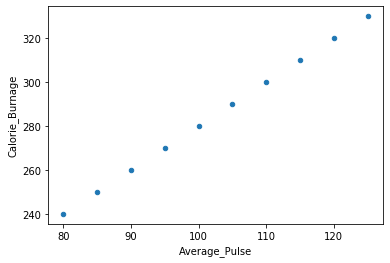

In [39]:
import matplotlib.pyplot as plt

dados.plot(x ='Average_Pulse', y='Calorie_Burnage', kind='scatter')
plt.show()

Como vimos anteriormente, existe uma relação linear perfeita entre **Average_Pulse** e **Calorie_Burnage**.

### Exemplo de uma relação linear negativa perfeita (coeficiente de correlação = -1)

Usamos dados fictícios neste exemplo. 

- O **eixo x** representa a quantidade de horas trabalhadas em nosso trabalho antes de uma sessão de treinamento. 

- O **eixo y** é Calorie_Burnage.

Se trabalharmos mais horas, tendemos a queimar menos calorias porque ficamos exaustos antes da sessão de treinamento.

O coeficiente de correlação aqui é `-1`.

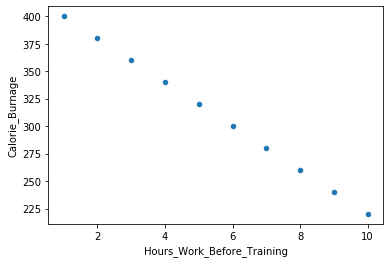

In [40]:
negative_corr = {
    'Hours_Work_Before_Training': [10,9,8,7,6,5,4,3,2,1],
    'Calorie_Burnage': [220,240,260,280,300,320,340,360,380,400]
}
negative_corr = pd.DataFrame(data=negative_corr)

negative_corr.plot(x ='Hours_Work_Before_Training', y='Calorie_Burnage', kind='scatter')
plt.show()

### Exemplo de relação não linear (coeficiente de correlação = 0)

Aqui, plotamos **Max_Pulse** em relação à **Duration**.

Como você pode ver, não existe uma relação linear entre as duas variáveis. 

Isso significa que uma sessão de treinamento mais longa não leva a um **Max_Pulse** mais alto.

O coeficiente de correlação aqui é `0`.

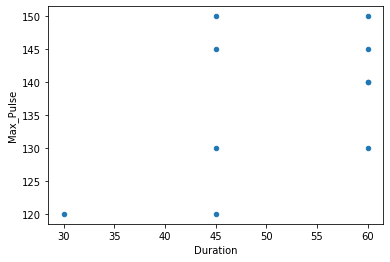

In [41]:
dados.plot(x ='Duration', y='Max_Pulse', kind='scatter')
plt.show()

## Matriz de Correlação

Uma matriz é uma matriz de números organizados em **linhas** e **colunas**.

Uma matriz de correlação é simplesmente uma tabela que mostra os coeficientes de correlação entre as variáveis.

Aqui, as variáveis são representadas na primeira linha e na primeira coluna.

In [44]:
df.corr()

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
Duration,1.000000,0.968330,0.951405,0.968330,-0.425423,0.878310
Average_Pulse,0.968330,1.000000,0.969762,1.000000,-0.424958,0.870388
Max_Pulse,0.951405,0.969762,1.000000,0.969762,-0.558554,0.835629
Calorie_Burnage,0.968330,1.000000,0.969762,1.000000,-0.424958,0.870388
Hours_Work,-0.425423,-0.424958,-0.558554,-0.424958,1.000000,-0.174371
Hours_Sleep,0.878310,0.870388,0.835629,0.870388,-0.174371,1.000000


Observações:

- Observamos que **Duration** e **Calorie_Burnage** estão intimamente relacionados, com um coeficiente de correlação de 0.968330 (Isso faz sentido, pois quanto mais treinamos, mais calorias queimamos)
- Observamos que não há relações lineares entre **Hours_Sleep** e **Hours_Work** (coeficiente de correlação de -0.174371)

Podemos usar a função **corr()** para criar uma matriz de correlação. 

Também usamos a função **round()** para arredondar o output para duas casas decimais.

In [46]:
corr_matrix = round(df.corr(),2)
corr_matrix

,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
Duration,1.00,0.97,0.95,0.97,-0.43,0.88
Average_Pulse,0.97,1.00,0.97,1.00,-0.42,0.87
Max_Pulse,0.95,0.97,1.00,0.97,-0.56,0.84
Calorie_Burnage,0.97,1.00,0.97,1.00,-0.42,0.87
Hours_Work,-0.43,-0.42,-0.56,-0.42,1.00,-0.17
Hours_Sleep,0.88,0.87,0.84,0.87,-0.17,1.00


## Usando um Heatmap

Podemos usar um Heatmap para visualizar a correlação entre as variáveis.

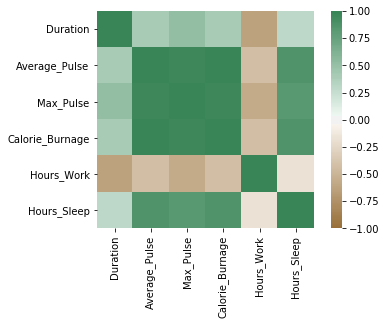

In [48]:
import seaborn as sns

corr = dados.corr()

axis_corr = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.show()

- Quanto mais próximo o coeficiente de correlação estiver de 1, mais verdes ficarão os quadrados.

- Quanto mais próximo o coeficiente de correlação estiver de -1, mais castanhos ficarão os quadrados.